In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the Wine Quality (Red) dataset
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv
df = pd.read_csv('winequality-red.csv', sep=';')

--2025-03-09 00:15:55--  https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘winequality-red.csv’

winequality-red.csv     [ <=>                ]  82.23K   449KB/s    in 0.2s    

2025-03-09 00:15:55 (449 KB/s) - ‘winequality-red.csv’ saved [84199]



,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


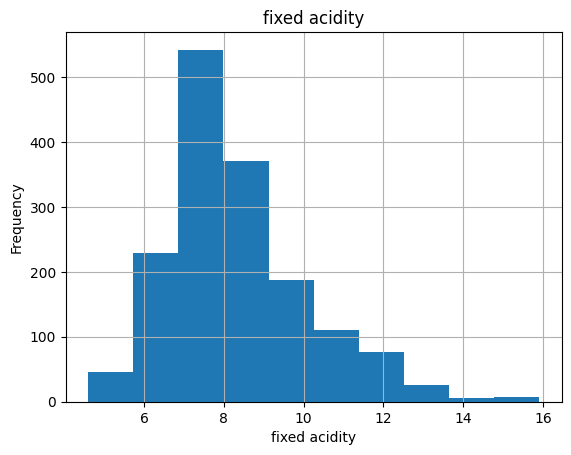

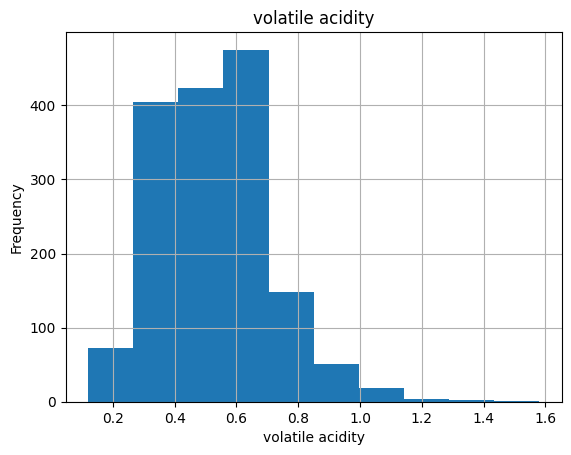

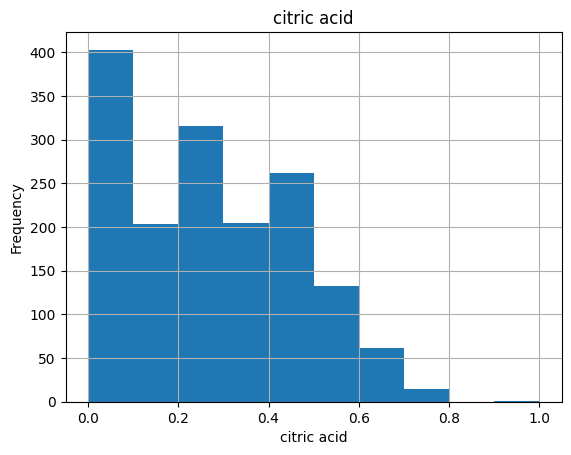

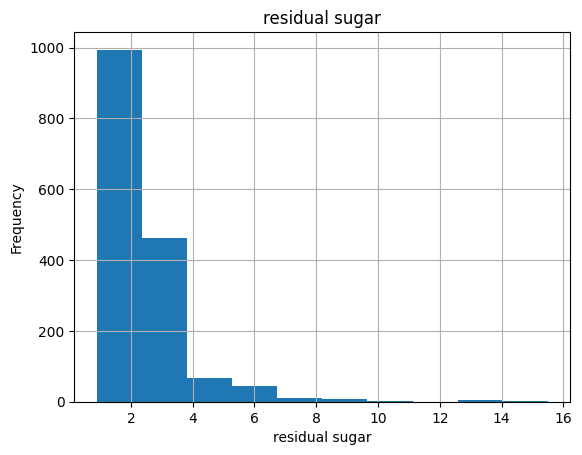

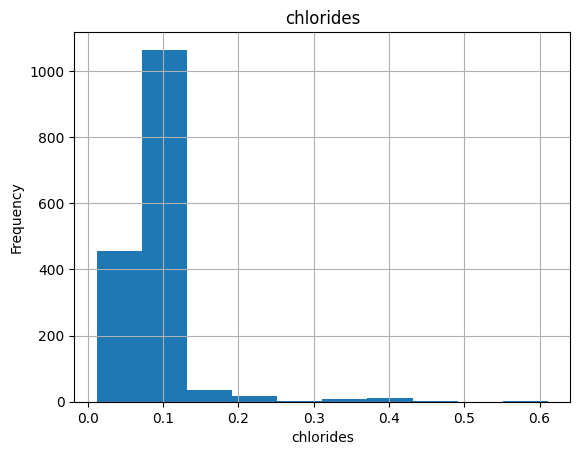

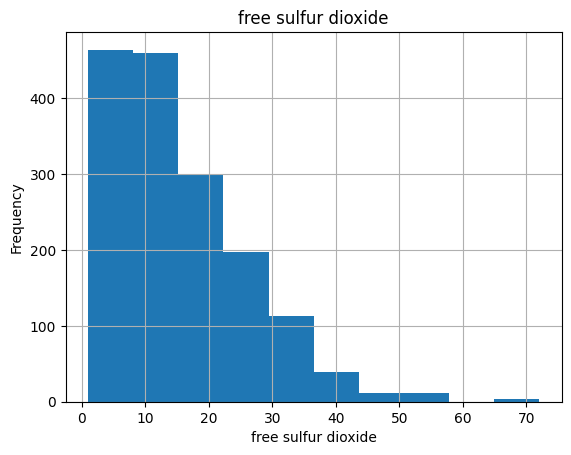

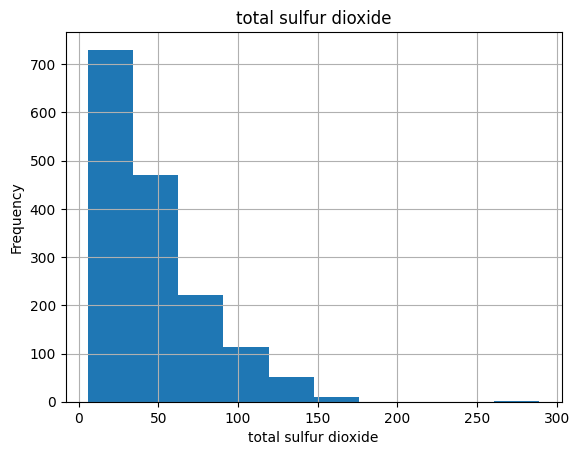

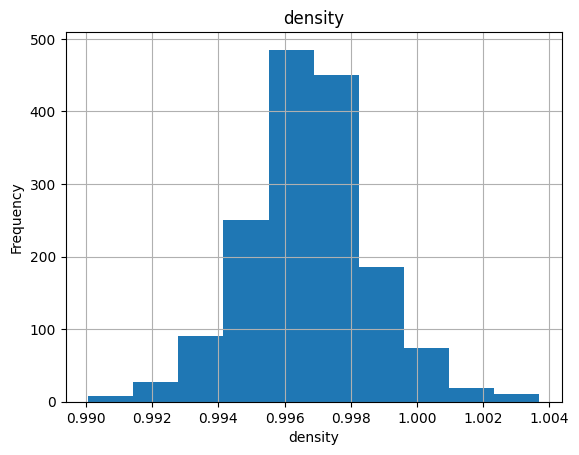

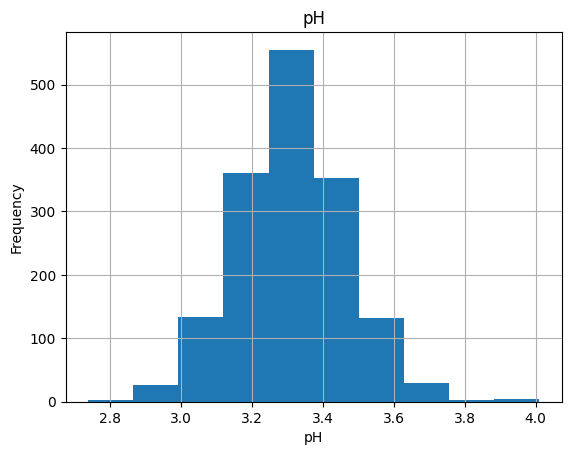

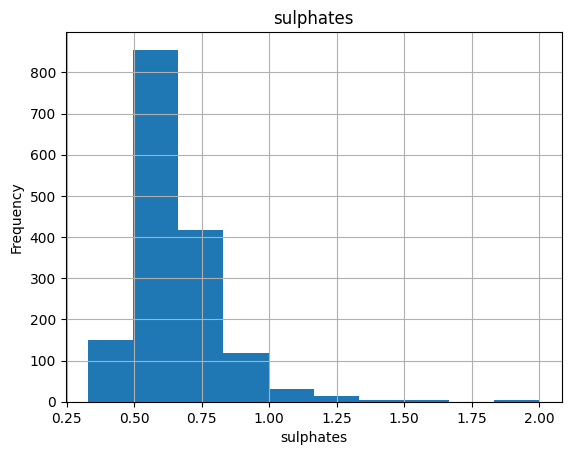

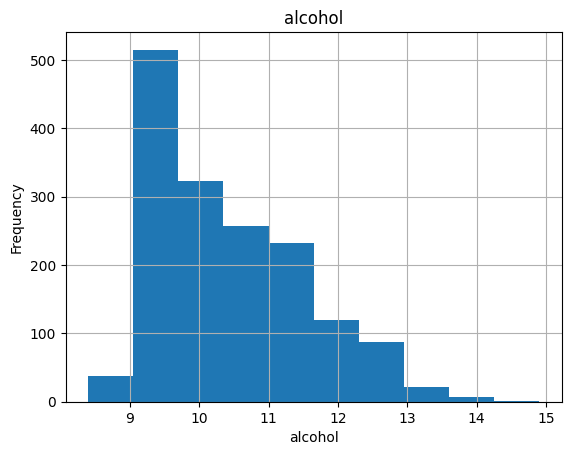

In [7]:
# histograms for numeric columns and bar charts for categorical columns

# seperating 'quality' out from the data
numeric_columns = df.drop('quality', axis=1).columns
categorical_column = 'quality'

# Histograms
for col in numeric_columns:
    plt.figure()
    df[col].hist()
    plt.title(f'{col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()


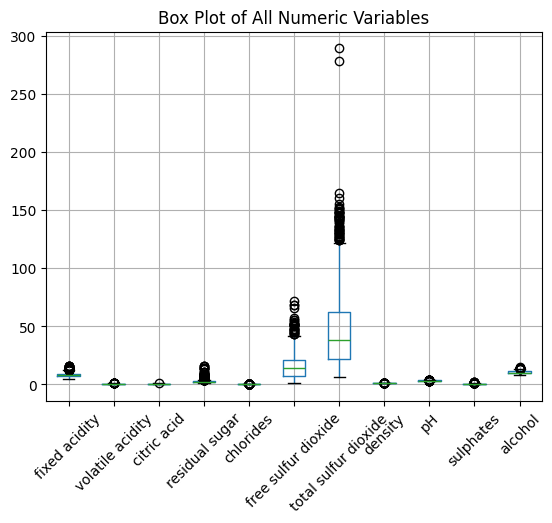

In [10]:
# single box plot
plt.figure()
df[numeric_columns].boxplot()
plt.title('Box Plot of All Numeric Variables')
plt.xticks(rotation=45)
plt.show()


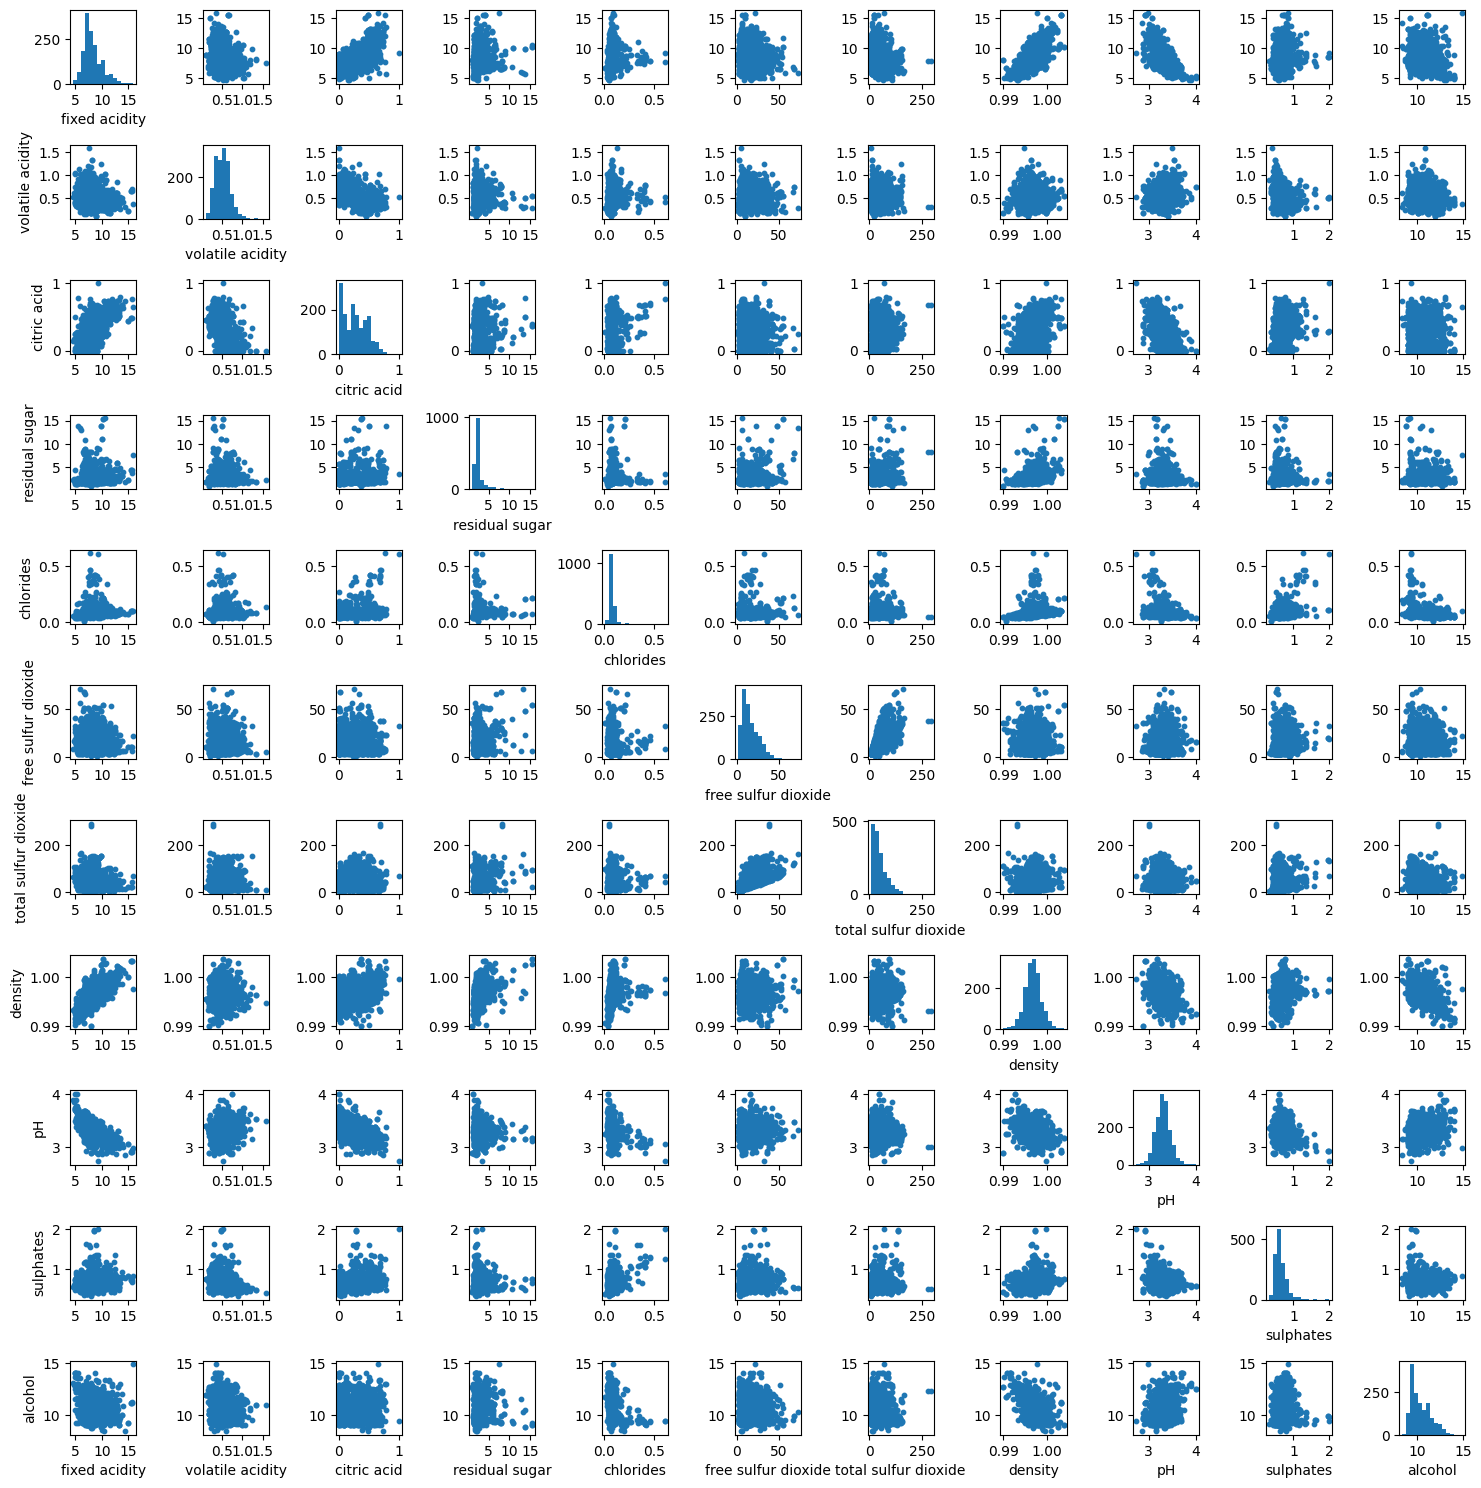

In [9]:
# Pairwise Scatter Plot Matrix
import itertools

num_cols = list(numeric_columns)
n = len(num_cols)

plt.figure(figsize=(15, 15))

# Create a grid of scatter plots
for i, j in itertools.product(range(n), range(n)):
    plt.subplot(n, n, i*n + j + 1)
    if i == j:
        plt.hist(df[num_cols[i]], bins=15)
        plt.xlabel(num_cols[i])
    else:
        # Scatter plot
        plt.scatter(df[num_cols[j]], df[num_cols[i]], s=10)
        if j == 0:
            plt.ylabel(num_cols[i])
        if i == n-1:
            plt.xlabel(num_cols[j])
plt.tight_layout()
plt.show()
